In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv(f"C:\\Users\\lokes\\OneDrive\\Desktop\\Project-Housing_splitted\\train.csv")
df_test = pd.read_csv(f"C:\\Users\\lokes\\OneDrive\\Desktop\\Project-Housing_splitted\\test.csv")

In [3]:
print("shape of df_train",df_train.shape)
print("shape of df_test",df_test.shape)

shape of df_train (1168, 81)
shape of df_test (292, 80)


In [4]:
pd.set_option('display.max_columns',99)

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df_train.isnull().sum()*100/df_train.shape[0]

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      18.321918
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

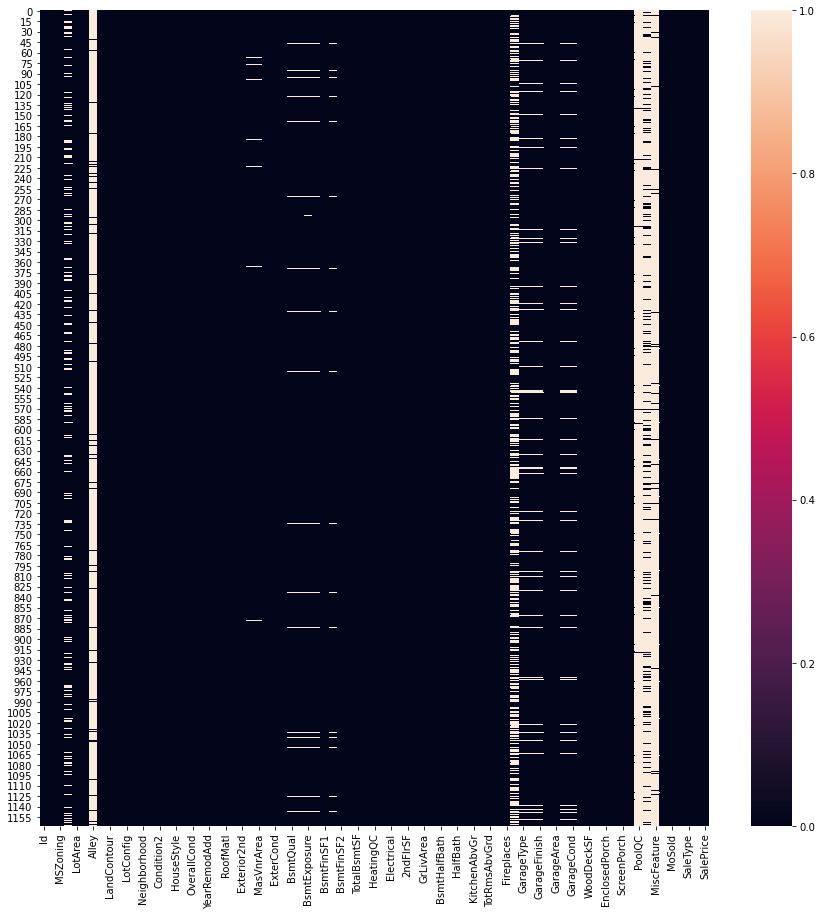

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.isnull())

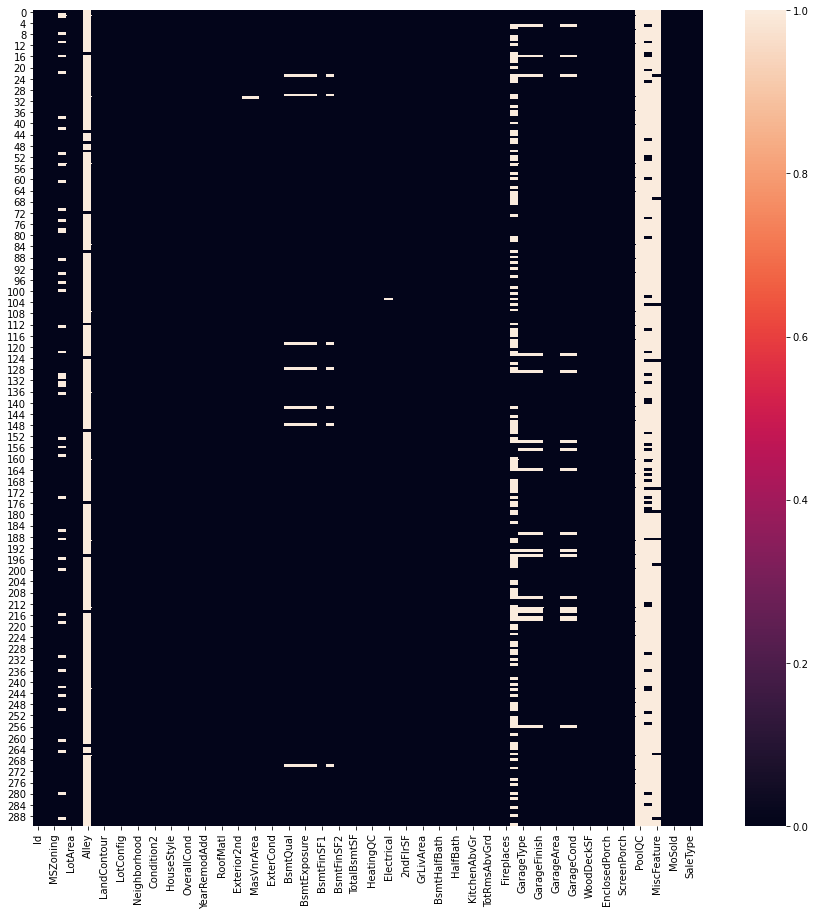

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df_test.isnull())

### Fill Missing Values

In [11]:
df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())


df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())

In [12]:
df_train.drop(['Alley'],axis=1,inplace=True)
df_test.drop(['Alley'],axis=1,inplace=True)

In [13]:
df_train['BsmtCond']=df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])

In [14]:
df_train['FireplaceQu']=df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])

In [15]:
df_train.drop(['GarageYrBlt'],axis=1,inplace=True)
df_test.drop(['GarageYrBlt'],axis=1,inplace=True)

In [16]:
df_train['GarageFinish']=df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual']=df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond']=df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_train['BsmtQual']=df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_train['BsmtFinType1']=df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])


df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['MasVnrType']=df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['BsmtCond']=df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['Electrical']=df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])
df_test['FireplaceQu']=df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])



In [17]:
df_train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

df_test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [18]:
df_train.drop(['Id'],axis=1,inplace=True)
df_test.drop(['Id'],axis=1,inplace=True)

In [19]:
df_train['MasVnrType']=df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0])

In [20]:
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])

In [21]:
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])

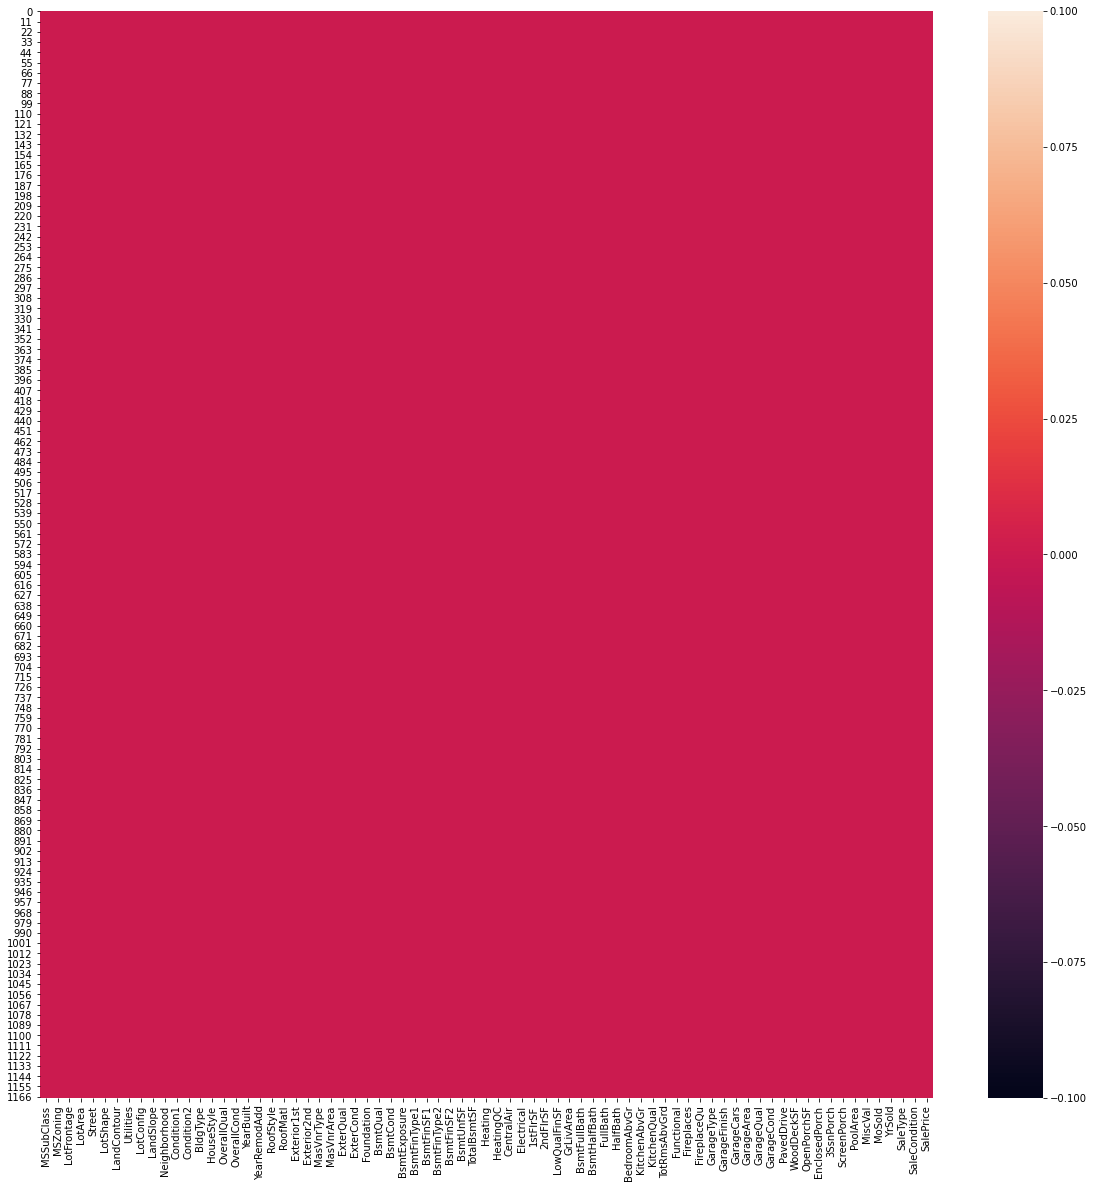

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.isnull())

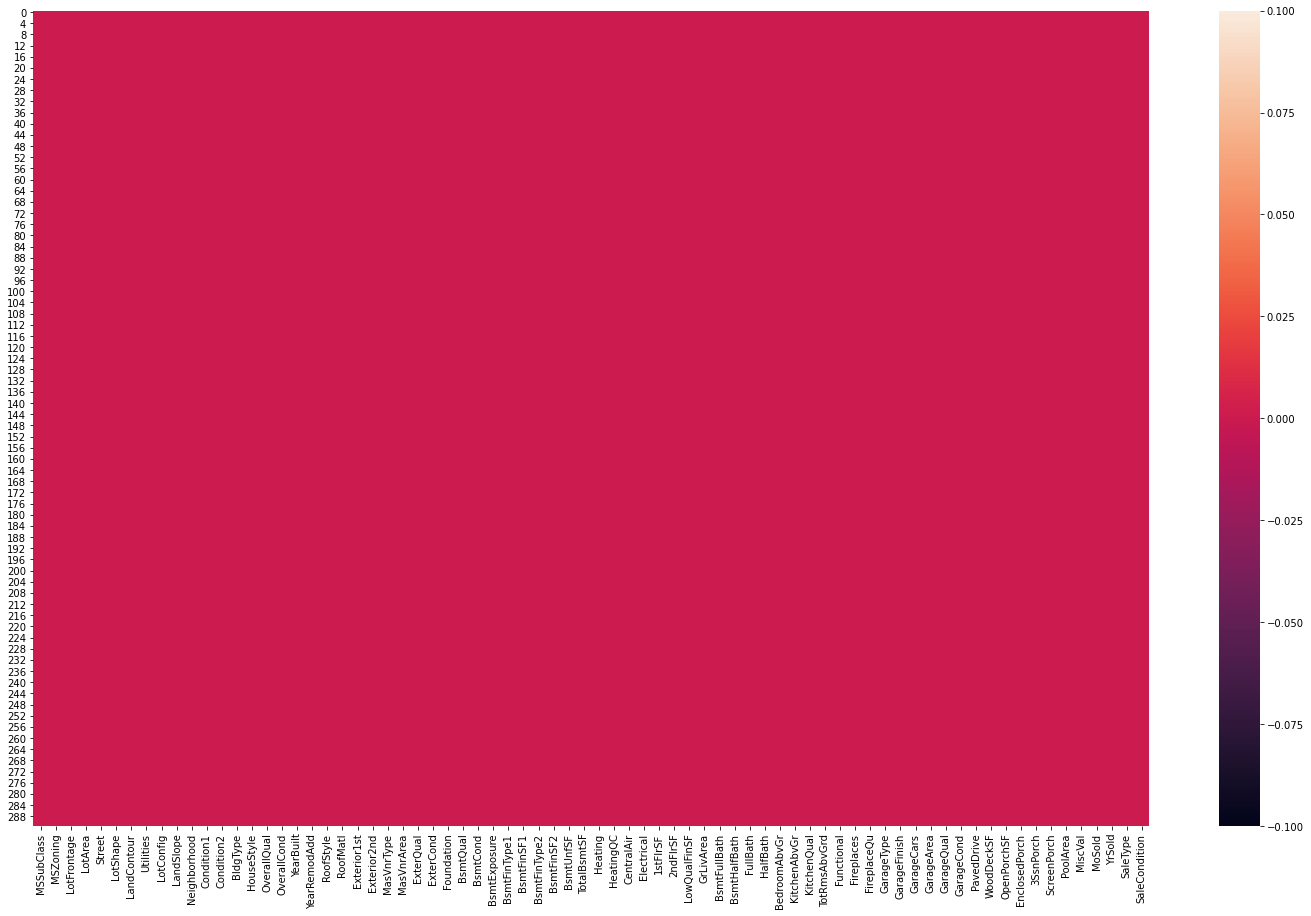

In [23]:
plt.figure(figsize=(25,15))
sns.heatmap(df_test.isnull())

In [24]:
numeric_data = df_train.select_dtypes(include=['int64','float64'])
numeric_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [25]:
numeric_data1 = df_test.select_dtypes(include=['int64','float64'])
numeric_data1.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

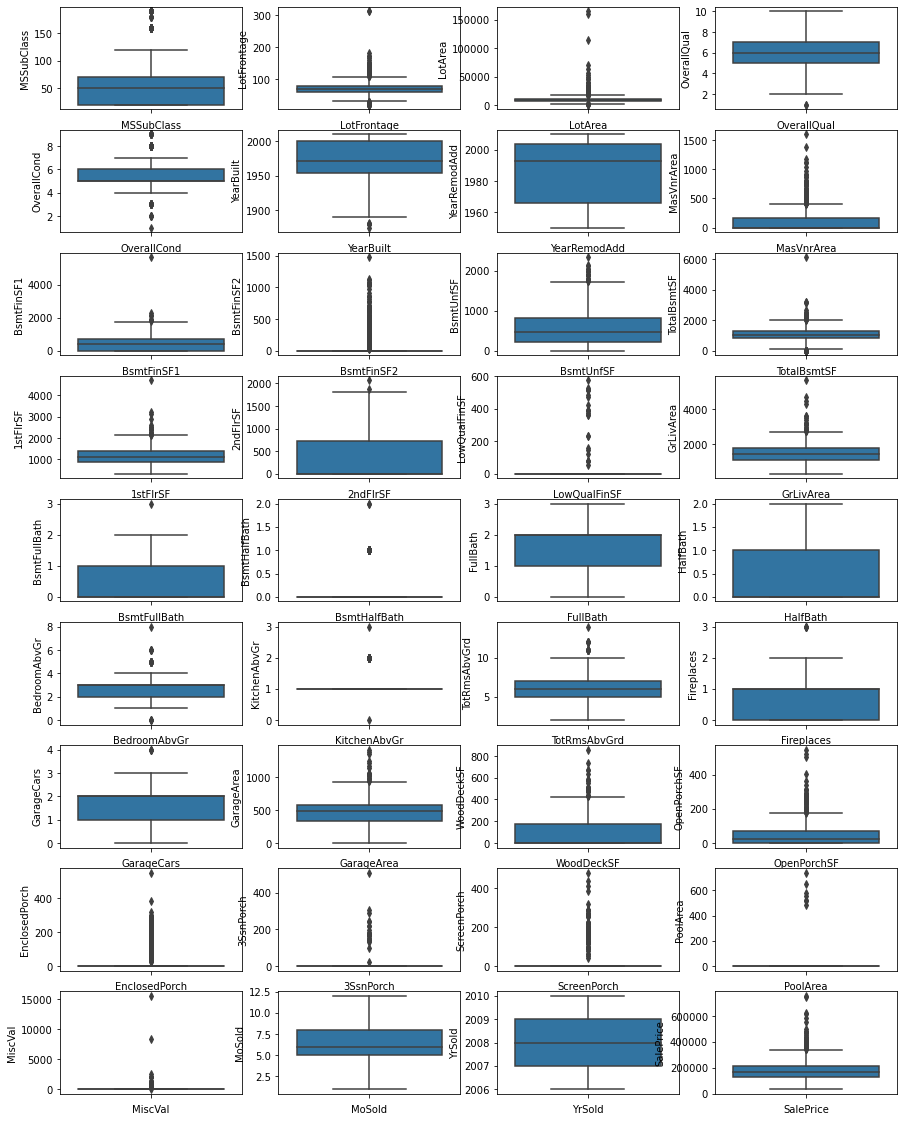

In [26]:
plt.figure(figsize=(15,20))
plotnumber = 1
for column in numeric_data:
    if plotnumber <=36:
        plt.subplot(9,4,plotnumber)
        sns.boxplot(numeric_data[column],orient='v')
        plt.xlabel(column,fontsize=10)
        plotnumber+=1

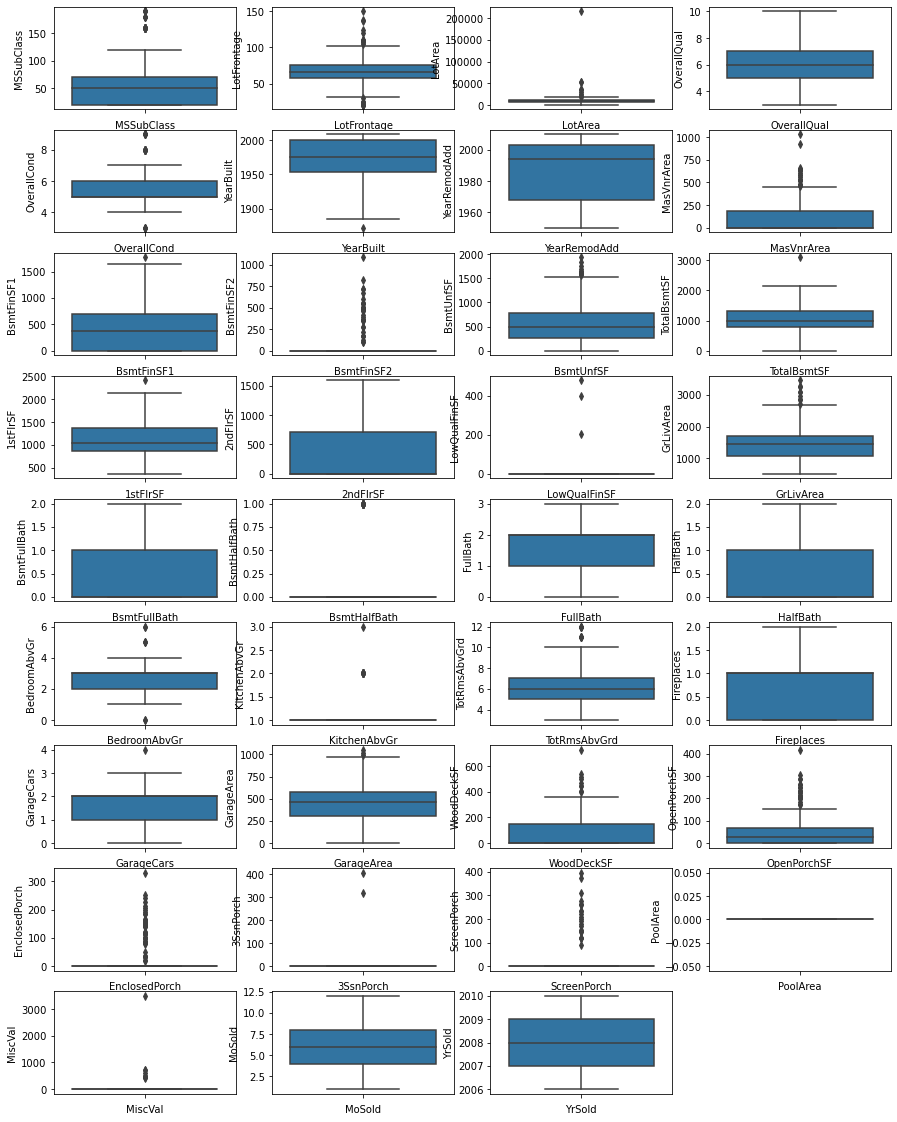

In [27]:
plt.figure(figsize=(15,20))
plotnumber = 1
for column in numeric_data1:
    if plotnumber <=36:
        plt.subplot(9,4,plotnumber)
        sns.boxplot(numeric_data1[column],orient='v')
        plt.xlabel(column,fontsize=10)
        plotnumber+=1

In [28]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson')

In [29]:
df_train['MSSubClass'] = power.fit_transform(df_train['MSSubClass'].values.reshape(-1,1))
df_train['LotFrontage'] = power.fit_transform(df_train['LotFrontage'].values.reshape(-1,1))
df_train['LotArea'] = power.fit_transform(df_train['LotArea'].values.reshape(-1,1))
df_train['OverallCond'] = power.fit_transform(df_train['OverallCond'].values.reshape(-1,1))
df_train['YearBuilt'] = power.fit_transform(df_train['YearBuilt'].values.reshape(-1,1))
df_train['MasVnrArea'] = power.fit_transform(df_train['MasVnrArea'].values.reshape(-1,1))
df_train['BsmtFinSF1'] = power.fit_transform(df_train['BsmtFinSF1'].values.reshape(-1,1))
df_train['BsmtFinSF2'] = power.fit_transform(df_train['BsmtFinSF2'].values.reshape(-1,1))
df_train['BsmtUnfSF'] = power.fit_transform(df_train['BsmtUnfSF'].values.reshape(-1,1))
df_train['TotalBsmtSF'] = power.fit_transform(df_train['TotalBsmtSF'].values.reshape(-1,1))
df_train['1stFlrSF'] = power.fit_transform(df_train['1stFlrSF'].values.reshape(-1,1))
df_train['LowQualFinSF'] = power.fit_transform(df_train['LowQualFinSF'].values.reshape(-1,1))
df_train['GrLivArea'] = power.fit_transform(df_train['GrLivArea'].values.reshape(-1,1))
df_train['BsmtHalfBath'] = power.fit_transform(df_train['BsmtHalfBath'].values.reshape(-1,1))
df_train['BedroomAbvGr'] = power.fit_transform(df_train['BedroomAbvGr'].values.reshape(-1,1))
df_train['KitchenAbvGr'] = power.fit_transform(df_train['KitchenAbvGr'].values.reshape(-1,1))
df_train['TotRmsAbvGrd'] = power.fit_transform(df_train['TotRmsAbvGrd'].values.reshape(-1,1))
df_train['GarageCars'] = power.fit_transform(df_train['GarageCars'].values.reshape(-1,1))
df_train['GarageArea'] = power.fit_transform(df_train['GarageArea'].values.reshape(-1,1))
df_train['WoodDeckSF'] = power.fit_transform(df_train['WoodDeckSF'].values.reshape(-1,1))
df_train['OpenPorchSF'] = power.fit_transform(df_train['OpenPorchSF'].values.reshape(-1,1))
df_train['EnclosedPorch'] = power.fit_transform(df_train['EnclosedPorch'].values.reshape(-1,1))
df_train['3SsnPorch'] = power.fit_transform(df_train['3SsnPorch'].values.reshape(-1,1))
df_train['ScreenPorch'] = power.fit_transform(df_train['ScreenPorch'].values.reshape(-1,1))
df_train['PoolArea'] = power.fit_transform(df_train['PoolArea'].values.reshape(-1,1))
df_train['MiscVal'] = power.fit_transform(df_train['MiscVal'].values.reshape(-1,1))

In [30]:
df_test['MSSubClass'] = power.fit_transform(df_test['MSSubClass'].values.reshape(-1,1))
df_test['LotFrontage'] = power.fit_transform(df_test['LotFrontage'].values.reshape(-1,1))
df_test['LotArea'] = power.fit_transform(df_test['LotArea'].values.reshape(-1,1))
df_test['OverallCond'] = power.fit_transform(df_test['OverallCond'].values.reshape(-1,1))
df_test['YearBuilt'] = power.fit_transform(df_test['YearBuilt'].values.reshape(-1,1))
df_test['MasVnrArea'] = power.fit_transform(df_test['MasVnrArea'].values.reshape(-1,1))
df_test['BsmtFinSF1'] = power.fit_transform(df_test['BsmtFinSF1'].values.reshape(-1,1))
df_test['BsmtFinSF2'] = power.fit_transform(df_test['BsmtFinSF2'].values.reshape(-1,1))
df_test['BsmtUnfSF'] = power.fit_transform(df_test['BsmtUnfSF'].values.reshape(-1,1))
df_test['TotalBsmtSF'] = power.fit_transform(df_test['TotalBsmtSF'].values.reshape(-1,1))
df_test['1stFlrSF'] = power.fit_transform(df_test['1stFlrSF'].values.reshape(-1,1))
df_test['LowQualFinSF'] = power.fit_transform(df_test['LowQualFinSF'].values.reshape(-1,1))
df_test['GrLivArea'] = power.fit_transform(df_test['GrLivArea'].values.reshape(-1,1))
df_test['BsmtHalfBath'] = power.fit_transform(df_test['BsmtHalfBath'].values.reshape(-1,1))
df_test['BedroomAbvGr'] = power.fit_transform(df_test['BedroomAbvGr'].values.reshape(-1,1))
df_test['KitchenAbvGr'] = power.fit_transform(df_test['KitchenAbvGr'].values.reshape(-1,1))
df_test['TotRmsAbvGrd'] = power.fit_transform(df_test['TotRmsAbvGrd'].values.reshape(-1,1))
df_test['GarageCars'] = power.fit_transform(df_test['GarageCars'].values.reshape(-1,1))
df_test['GarageArea'] = power.fit_transform(df_test['GarageArea'].values.reshape(-1,1))
df_test['WoodDeckSF'] = power.fit_transform(df_test['WoodDeckSF'].values.reshape(-1,1))
df_test['OpenPorchSF'] = power.fit_transform(df_test['OpenPorchSF'].values.reshape(-1,1))
df_test['EnclosedPorch'] = power.fit_transform(df_test['EnclosedPorch'].values.reshape(-1,1))
df_test['3SsnPorch'] = power.fit_transform(df_test['3SsnPorch'].values.reshape(-1,1))
df_test['ScreenPorch'] = power.fit_transform(df_test['ScreenPorch'].values.reshape(-1,1))
df_test['PoolArea'] = power.fit_transform(df_test['PoolArea'].values.reshape(-1,1))
df_test['MiscVal'] = power.fit_transform(df_test['MiscVal'].values.reshape(-1,1))

In [31]:
numeric_data2 = df_train.select_dtypes(include=['int64','float64'])
numeric_data2.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

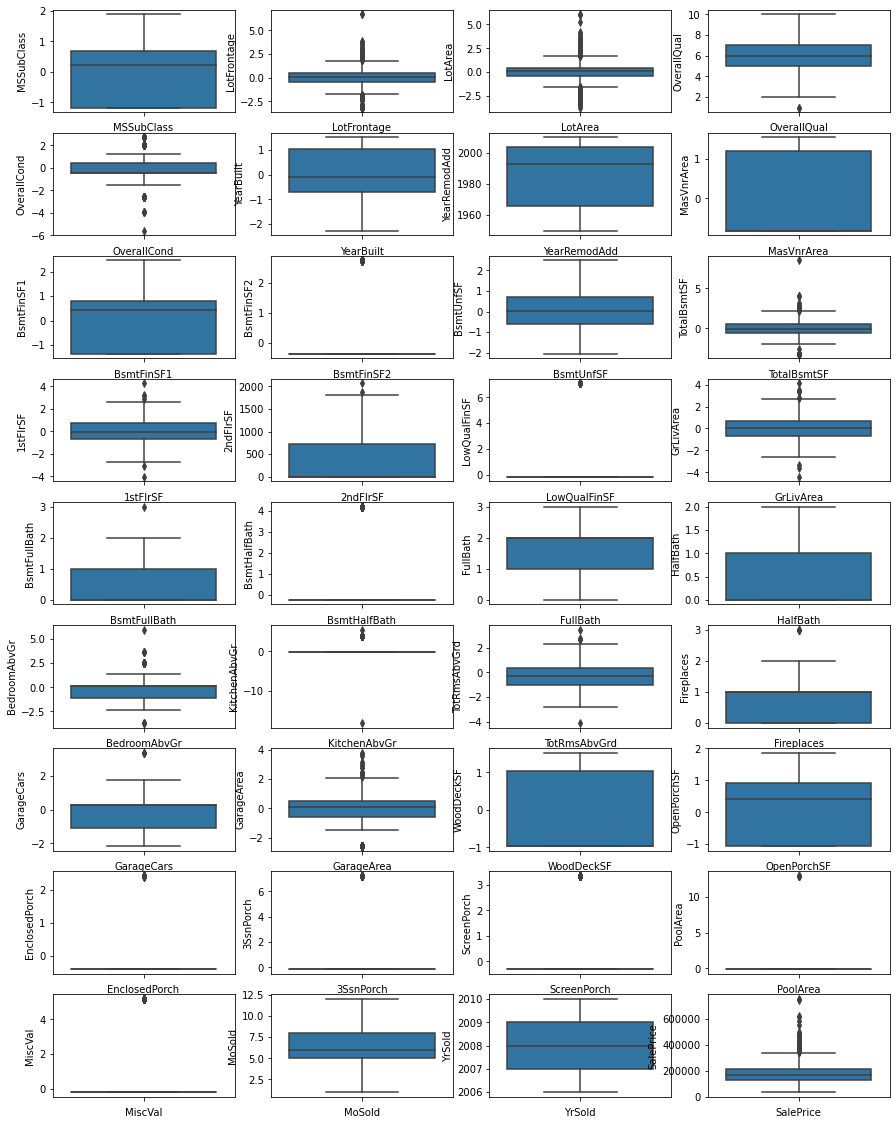

In [32]:
plt.figure(figsize=(15,20))
plotnumber = 1
for column in numeric_data2:
    if plotnumber <=36:
        plt.subplot(9,4,plotnumber)
        sns.boxplot(numeric_data2[column],orient='v')
        plt.xlabel(column,fontsize=10)
        plotnumber+=1

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
df_train = df_train.apply(LabelEncoder().fit_transform)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,11,3,41,80,1,0,3,0,4,0,13,2,2,4,2,5,4,75,26,1,1,8,9,2,0,3,4,1,2,3,3,0,25,5,0,500,286,1,4,1,4,180,0,0,70,0,0,2,0,2,1,3,3,6,1,4,1,1,2,118,4,4,2,0,144,0,0,0,0,0,1,1,8,4,129
1,0,3,66,808,1,0,3,0,4,1,12,2,2,0,2,7,5,69,20,0,5,12,13,2,0,2,2,2,3,1,1,0,112,4,107,527,624,1,0,1,4,654,0,0,646,1,0,2,0,4,1,2,6,6,1,4,1,2,2,248,4,4,2,29,145,0,0,48,0,0,9,1,8,4,468
2,5,3,63,449,1,0,3,0,1,0,15,2,2,0,5,6,4,95,47,1,1,7,7,2,0,2,4,2,2,3,0,2,382,5,0,135,312,1,0,1,4,295,215,0,585,1,0,2,1,3,1,3,6,6,1,4,1,2,2,129,4,4,2,96,101,0,0,0,0,0,5,1,8,4,470
3,0,3,76,632,1,0,3,0,4,0,14,2,2,0,2,5,5,76,27,3,1,8,9,1,237,3,4,1,2,3,3,1,312,5,0,558,590,1,0,1,4,617,0,0,520,0,0,2,0,3,1,3,5,6,1,4,1,1,2,200,4,4,2,0,95,0,0,0,0,0,0,4,0,4,326
4,0,3,41,821,1,0,3,0,2,0,14,2,2,0,2,5,6,76,50,1,1,4,4,3,74,2,4,1,2,3,3,0,489,5,0,192,537,1,2,1,4,541,0,0,399,0,1,2,0,3,1,2,6,6,1,4,1,0,2,188,4,4,2,140,0,0,0,0,0,0,5,3,8,4,379


In [35]:
df_test = df_test.apply(LabelEncoder().fit_transform)
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,2,48,215,1,0,1,0,0,0,21,2,0,0,2,6,2,79,52,3,0,9,11,3,46,2,3,2,0,2,1,2,170,5,0,139,217,0,0,1,3,229,0,0,203,1,0,2,0,3,0,2,5,5,1,2,1,0,3,129,4,4,2,46,27,0,0,0,0,0,6,1,5,2
1,11,2,31,34,1,0,3,0,1,0,21,2,0,4,2,5,2,60,31,1,0,5,5,2,0,2,3,1,2,2,0,2,151,5,0,24,139,0,2,1,3,167,0,0,93,1,0,1,0,1,0,2,1,5,1,0,1,1,2,104,4,4,2,9,0,0,0,0,0,0,7,3,0,0
2,0,2,31,180,1,3,3,0,4,0,4,2,0,0,2,5,2,75,47,3,0,9,11,2,0,2,3,2,2,2,0,5,0,5,0,228,209,0,0,1,3,223,0,0,190,0,0,2,0,3,0,0,4,5,1,4,1,1,2,89,4,4,2,50,72,0,0,0,0,0,5,3,5,2
3,6,2,40,185,1,3,0,0,4,0,5,2,0,0,5,4,4,25,0,1,0,6,7,2,0,3,3,1,3,2,3,4,28,5,0,92,31,0,0,1,3,57,41,0,138,0,0,1,1,3,0,1,4,5,1,2,1,2,1,6,4,4,2,0,0,0,0,0,0,0,6,3,5,2
4,5,2,48,220,1,0,3,0,1,0,20,1,0,0,5,3,2,81,53,1,0,9,11,3,11,2,3,2,2,2,2,5,0,5,0,181,76,0,0,1,3,65,93,0,205,0,0,2,1,4,0,2,6,5,1,2,3,0,3,126,4,4,2,17,3,0,0,0,0,0,0,2,5,2


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [37]:
X = df_train.drop(columns=['SalePrice'],axis=1)
y = df_train['SalePrice']

In [38]:
print("Shape of X", X.shape)
print("Shape of Y", y.shape)

Shape of X (1168, 74)
Shape of Y (1168,)


In [39]:
# Scaling the features using standardscaler
scaler = StandardScaler()

In [40]:
x_scale =  scaler.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test  = train_test_split(x_scale, y, test_size=0.30,random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [43]:
lr=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
adb=AdaBoostRegressor()

print("Model is created")

Model is created


In [44]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)

print("Model is trained")

Model is trained


In [45]:
print("lr_score",lr.score(X_train,y_train))
print("knn_score",knn.score(X_train,y_train))
print("dt_score",dt.score(X_train,y_train))
print("rf_score",rf.score(X_train,y_train))
print("adb_score",adb.score(X_train,y_train))


lr_score 0.9173631572631761
knn_score 0.8729122878704038
dt_score 1.0
rf_score 0.9844045994465215
adb_score 0.8975038238728331


### Model Evaluation

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [47]:
lr_pred_y = lr.predict(X_test)
knn_pred_y = knn.predict(X_test)
dt_pred_y = dt.predict(X_test)
rf_pred_y = rf.predict(X_test)
adb_pred_y = adb.predict(X_test)

In [48]:
print("lr_score",mean_squared_error(y_test,lr_pred_y))
print("knn_score",mean_squared_error(y_test,knn_pred_y))
print("dt_score",mean_squared_error(y_test,dt_pred_y))
print("rf_score",mean_squared_error(y_test,rf_pred_y))
print("adb_score",mean_squared_error(y_test,adb_pred_y))

lr_score 2539.4564283154805
knn_score 4420.931737891738
dt_score 5497.119658119658
rf_score 2979.4789096866098
adb_score 3668.6127538802184


### Cross validation:

In [49]:
from sklearn.model_selection import KFold,cross_val_score

In [50]:
k_f = KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [51]:
print("Cross validation score for lr model","=>",cross_val_score(lr,X,y,cv=5))
print("Cross validation score for knn model","=>",cross_val_score(knn,X,y,cv=5))
print("Cross validation score for dt model","=>",cross_val_score(dt,X,y,cv=5))
print("Cross validation score for rf model","=>",cross_val_score(rf,X,y,cv=5))
print("Cross validation score for adb model","=>",cross_val_score(adb,X,y,cv=5))

Cross validation score for lr model => [0.9192724  0.87008538 0.84820237 0.90708106 0.89187413]
Cross validation score for knn model => [0.81521299 0.75622831 0.7686182  0.7725378  0.71334831]
Cross validation score for dt model => [0.76553021 0.70606012 0.68827123 0.78442901 0.72986909]
Cross validation score for rf model => [0.88510284 0.89335863 0.86435327 0.89511177 0.88456767]
Cross validation score for adb model => [0.85462362 0.85714421 0.83411719 0.84986722 0.82702801]


In [52]:
print("Cross validation score for lr model","=>",cross_val_score(lr,X,y,cv=5).mean())
print("Cross validation score for knn model","=>",cross_val_score(knn,X,y,cv=5).mean())
print("Cross validation score for dt model","=>",cross_val_score(dt,X,y,cv=5).mean())
print("Cross validation score for rf model","=>",cross_val_score(rf,X,y,cv=5).mean())
print("Cross validation score for adb model","=>",cross_val_score(adb,X,y,cv=5).mean())

Cross validation score for lr model => 0.887303067459977
Cross validation score for knn model => 0.7651891192339664
Cross validation score for dt model => 0.7353322831756455
Cross validation score for rf model => 0.8841972611635459
Cross validation score for adb model => 0.8441032220350648


As per cross validation i found decesion tree model will be good predictor for our problem.hence we will be trying to increase the chances of the accuracy using hyperparameter.

### Hyperparameter Technique:

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [55]:
parm_grid = {'criterion':['mse','mae'],'splitter':['best'],
             'max_depth':[3,4,5,6],'min_samples_split':[2,5,6],
             'min_samples_leaf':[1,2,3,4,5,],'max_features':['auto','sqrt']}
parm_grid

{'criterion': ['mse', 'mae'],
 'splitter': ['best'],
 'max_depth': [3, 4, 5, 6],
 'min_samples_split': [2, 5, 6],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt']}

In [56]:
gridsearch = GridSearchCV(dt, param_grid = parm_grid , cv=3 , verbose = 2 ,n_jobs =4)

In [57]:
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=4,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 6], 'splitter': ['best']},
             verbose=2)

In [58]:
gridsearch.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'best'}

In [59]:
dt1=DecisionTreeRegressor(criterion='mse',max_depth=5,max_features='auto',min_samples_leaf=1,min_samples_split=2,splitter='best')

In [60]:
dt1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto')

In [61]:
dt1.score(X_train, y_train)

0.87758425257193

In [62]:
dt_pred_y = dt1.predict(X_test)

In [63]:
print("dt_score",mean_squared_error(y_test,dt_pred_y))

dt_score 4940.020428351136


### Model saving

In [64]:
import pickle

In [65]:
HOUSEPRICE = 'HOUSEPRICE_model.pickle'

In [66]:
pickle.dump(dt1,open(HOUSEPRICE,'wb'))

### Predicting test data using saved model

In [68]:
loaded_model = pickle.load(open(HOUSEPRICE, 'rb'))

In [69]:
loaded_model.predict(df_test)

array([236.        , 236.        , 236.        , 236.        ,
       236.        , 470.65384615, 236.        , 236.        ,
       236.        , 236.        , 393.        , 236.        ,
       236.        , 236.        , 236.        , 236.        ,
       247.66666667, 236.        , 236.        , 236.        ,
       236.        , 236.        , 236.        , 387.67391304,
       236.        , 236.        , 236.        , 236.        ,
       236.        , 276.10416667, 236.        , 236.        ,
       236.        , 236.        , 236.        , 236.        ,
       236.        , 236.        , 236.        , 236.        ,
       236.        , 236.        , 236.        , 236.        ,
       236.        , 236.        , 236.        , 236.        ,
       236.        , 236.        , 236.        , 236.        ,
       470.65384615, 236.        , 236.        , 470.65384615,
       236.        , 236.        , 236.        , 236.        ,
       470.65384615, 236.        , 236.        , 236.  